# Homework # 2 - Linear Regression - Quoc Hung Tran ID 23856431
Data file: salaries.csv

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load data

In [2]:
! pwd

/Users/rictq/Documents/CIS_3920_Homework


In [3]:
! head 'data/salaries.csv'

In [4]:
! ls

HUNG_QUOC_TRAN_HOMEWORK_1.ipynb Lectures
HUNG_QUOC_TRAN_HOMEWORK_2.ipynb data


### Examine data

In [5]:
df = pd.read_csv('data/salaries.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Separate independent and dependent variables
* Independent variable: YearsExperience
* Dependent variable: Salary

In [6]:
# YearsExperience - X (independent var) & Salary - Y (dependent var)
x_ye = df['YearsExperience']
print(x_ye.shape)
y_s = df['Salary']
print(y_s.shape)

(30,)
(30,)


In [7]:
# Reshape with Numpy Array for training a Linear Regression model
x_ye = np.array(x_ye).reshape(-1,1)
print(x_ye.shape)
y_s = np.array(y_s).reshape(-1,1)
print(y_s.shape)

(30, 1)
(30, 1)


### Split data into training and test sets

In [8]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_ye, y_s, test_size = 0.2, random_state = 5)
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


### Train a Linear Regression model on the training set

In [9]:
model = LinearRegression()
model.fit(x_train_1, y_train_1)

LinearRegression()

### Predict the test set results

In [10]:
y_test_predict_1 = model.predict(x_test_1)
mse = mean_squared_error(y_test_1, y_test_predict_1)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test_1, y_test_1), 2)

print("Simple model performance for test set")
print("-------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Simple model performance for test set
-------------------------------------
MSE is 35369798.22173562
RMSE is 5947.251316510478
R2 (model) score is 0.94


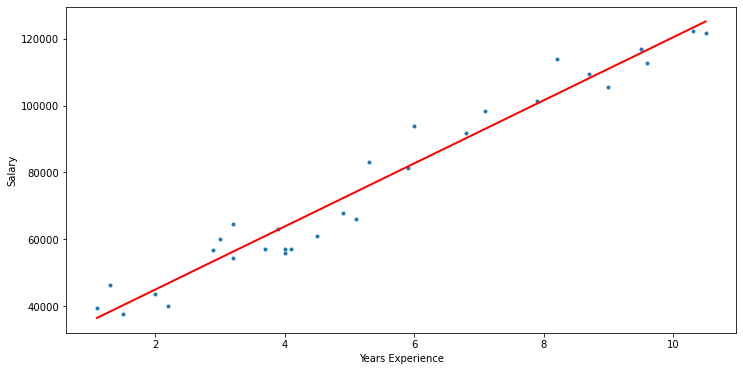

In [11]:
# Visualization
plt.figure(figsize=(12, 6))
prediction_space = np.linspace(min(x_ye), max(x_ye)).reshape(-1,1) 
plt.scatter(x_ye, y_s, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Salary')
plt.xlabel('Years Experience')
plt.show()